### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=Warning)
%matplotlib inline

### Functions

In [97]:
def dates_generator(all_dates, start_date, end_date):
    start =  all_dates.get_loc(start_date)
    end = all_dates.get_loc(end_date)
#     print(start)
#     print(end)
    dates = all_dates[start:end+1]
    return dates

def close_prices_generator(df, dates, names):
    close_prices = pd.DataFrame(index=dates)
    for name in names:
        tmp1 = df.loc[dates]
        df_sym = tmp1[tmp1["Name"]==name]
        df_tmp = pd.DataFrame(data=df_sym["Close"].to_numpy(), index=df_sym.index, columns=[name])
        close_prices = close_prices.join(df_tmp)
    return close_prices

def log_returns_calculator(close_prices, dates):
    returns = pd.DataFrame(index=dates[1:])
    for name in names:
        current_returns = close_prices[name].pct_change()
        returns[name] = current_returns.iloc[1:] * 100
        
    mean_return = returns.mean()
    cov = returns.cov()
        
    return returns, mean_return, cov


def scatter_plot(risks, returns):
    plt.scatter(risks, returns, alpha=0.1)
    plt.xlabel("Risk");
    plt.ylabel("Return");

    
def return_risk_calculator(N, mean_return, cov, mode=0):
    cov_np = cov.to_numpy()
    D = len(mean_return)
    returns = np.zeros(N)
    risks = np.zeros(N)
    for i in range(N):
        rand_range = 1.0
        if mode==0:
            w = np.random.random(D)*rand_range - rand_range # short selling enabled
            w[-1] = 1 - w[:-1].sum()
            np.random.shuffle(w)
        ret = mean_return.dot(w)
        risk = np.sqrt(w.dot(cov_np).dot(w))
        returns[i] = ret
        risks[i] = risk
    return returns, risks

def single_asset_returns_calculator(mean_return, cov):
    cov_np = cov.to_numpy()
    D = len(mean_return)
    single_asset_returns = np.zeros(D)
    single_asset_risks = np.zeros(D)
    for i in range(D):
        ret = mean_return[i]
        risk = np.sqrt(cov_np[i,i])
        
        single_asset_returns[i] = ret
        single_asset_risks[i] = risk
    return single_asset_returns, single_asset_risks

### Code

In [3]:
df = pd.read_csv("../02-Financial basics/sp500sub.csv", index_col="Date", parse_dates=True)

In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Name'], dtype='object')

In [5]:
df["Name"].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [6]:
names = ["GOOG", "SBUX", "KSS", "NEM"]

In [16]:
all_dates = df.index.unique().sort_values()

In [8]:
len(all_dates)

2267

In [18]:
dates = dates_generator(all_dates, start_date="2014-01-02", end_date="2014-06-30")

In [19]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [20]:
len(dates)

124

In [24]:
close_prices = close_prices_generator(df, dates, names)

In [25]:
close_prices.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-02,554.481689,38.584999,56.990002,23.959999
2014-01-03,550.436829,38.474998,56.860001,23.920000
2014-01-06,556.573853,38.084999,56.040001,24.080000
2014-01-07,567.303589,38.605000,56.099998,23.950001
2014-01-08,568.484192,39.014999,55.180000,23.400000


In [27]:
close_prices.isna().sum().sum()

0

In [28]:
close_prices.fillna(method="ffill", inplace=True)

In [29]:
close_prices.isna().sum().sum()

0

In [89]:
returns, mean_return, cov = log_returns_calculator(close_prices, dates)

In [90]:
returns.head()

,GOOG,SBUX,KSS,NEM
Date,,,,
2014-01-03,-0.729485,-0.285086,-0.228112,-0.166941
2014-01-06,1.114937,-1.013644,-1.442138,0.668896
2014-01-07,1.927819,1.365368,0.107062,-0.539864
2014-01-08,0.208108,1.062038,-1.639925,-2.296456
2014-01-09,-0.962997,-0.551071,0.688657,-0.854696


In [91]:
mean_return

GOOG    0.038691
SBUX    0.009955
KSS    -0.053793
NEM     0.072932
dtype: float64

In [92]:
cov

,GOOG,SBUX,KSS,NEM
GOOG,2.206565,0.832469,0.771772,-0.033600
SBUX,0.832469,1.558406,0.714586,0.374448
KSS,0.771772,0.714586,2.025854,0.180308
NEM,-0.033600,0.374448,0.180308,4.815104


In [93]:
N = 10000
returns, risks = return_risk_calculator(N, mean_return, cov, mode=0)

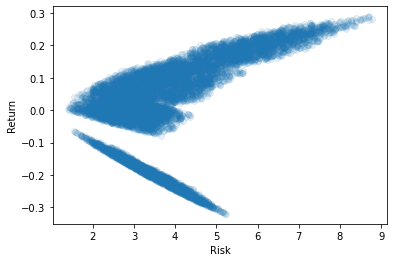

In [94]:
scatter_plot(risks, returns)

In [98]:
single_asset_returns, single_asset_risks = single_asset_returns_calculator(mean_return, cov)

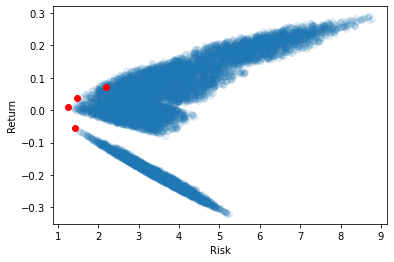

In [99]:
plt.scatter(risks, returns, alpha=0.1)
plt.scatter(single_asset_risks, single_asset_returns, c="red")
plt.xlabel("Risk")
plt.ylabel("Return");

In [100]:
for idx, val in cov["GOOG"].iteritems():
    print(idx, val)

GOOG 2.2065647788398772
SBUX 0.8324690007152389
KSS 0.7717715673917704
NEM -0.03360028033416307
